In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import sys
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), 'src'))

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import distance_transform_edt as edt
from src import utils
import pandas as pd

In [3]:
x = [[0, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 1]]

In [4]:
np.set_printoptions(precision=3)

In [5]:
result = edt(x)
result 

array([[0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 2.   , 3.   ],
       [0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 2.   , 2.236],
       [0.   , 1.   , 1.414, 1.   , 0.   , 1.   , 1.   , 1.414],
       [0.   , 0.   , 1.   , 1.   , 0.   , 0.   , 0.   , 1.   ]])

In [6]:
result - x

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 2.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 1.236],
       [0.   , 0.   , 0.414, 0.   , 0.   , 0.   , 0.   , 0.414],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

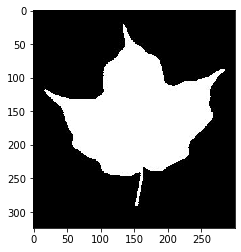

In [7]:
img = plt.imread('./data/edt_sample.jpg')
plt.imshow(img, 'gray')

(0.0, 69.18092222571191)

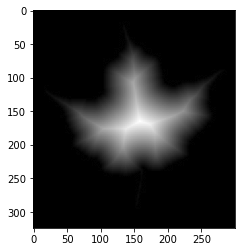

In [27]:
plt.imshow(edt(img), 'gray')
np.min(edt(img)), np.max(edt(img))

(0.0, 1.0)

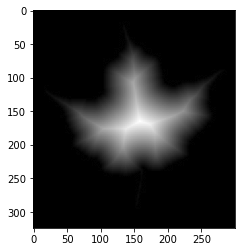

In [26]:
plt.imshow(utils.range_transform(edt(img)), 'gray')
np.min(utils.range_transform(edt(img))), np.max(utils.range_transform(edt(img)))

In [21]:
np.arange(0, nb_labeled)

array([0])

In [16]:
np.arange(nb_labeled, len(X_train))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
from __future__ import print_function

from keras.callbacks import ModelCheckpoint

from data import load_train_data
from utils import *

create_paths()
log_file = open(global_path + "logs/log_file_0228.txt", 'a')

# CEAL data definition
X_train, y_train = load_train_data()
labeled_index = np.arange(0, nb_labeled)
unlabeled_index = np.arange(nb_labeled, len(X_train))


Loading train data...



In [5]:
model = get_unet(dropout=True)
model_checkpoint = ModelCheckpoint(initial_weights_path, monitor='loss', save_best_only=True)
history = model.fit(X_train[labeled_index], y_train[labeled_index], batch_size=2, nb_epoch=nb_initial_epochs,
                            verbose=1, shuffle=True, callbacks=[model_checkpoint])

log(history, 0, log_file)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/amore/workspace/mvp/CEAL-Medical-Image-Segmentation/src/unet.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
/Users/amore/workspace/mvp/CEAL-Medical-Image-Segmentation/src/unet.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
/Users/amore/workspace/mvp/CEAL-Medical-Image-Segmentation/src/unet.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
/Users/amore/workspace/mvp/CEAL-Medical-Image-Segmentation/src/unet.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.3983 - dice_coef: 0.3983
Epoch 2/10
1/1 [==============================] - 1s 983ms/step - loss: -0.3987 - dice_coef: 0.3987
Epoch 3/10
1/1 [==============================] - 1s 931ms/step - loss: -0.3991 - dice_coef: 0.3991
Epoch 4/10
1/1 [==============================] - 1s 937ms/step - loss: -0.3995 - dice_coef: 0.3995
Epoch 5/10
1/1 [==============================] - 1s 948ms/step - loss: -0.3999 - dice_coef: 0.3999
Epoch 6/10
1/1 [==============================] - 1s 939ms/step - loss: -0.4003 - dice_coef: 0.4003
Epoch 7/10
1/1 [==============================] - 1s 947ms/step - loss: -0.4007 - dice_coef: 0.4007
Epoch 8/10
1/1 [==============================] - 1s 952ms/step - loss: -0.4011 - dice_coef: 0.4011
Epoch 9/10
1/1 [==============================] - 1s 934ms/step - loss: -0.4014 - dice_coef: 0.4014
Epoch 10/10
1/1 [==============================] - 1s 950ms/step - loss: -0.4018 - dice_coef: 0.4018


In [6]:
iteration = 1

weights = initial_weights_path

# (2) Labeling
# X_labeled_train, y_labeled_train, labeled_index, unlabeled_index = compute_train_sets(X_train, y_train,
#                                                                                       labeled_index,
#                                                                                       unlabeled_index, weights,
#                                                                                       iteration)
# compute_train_sets(X_train, y_train, labeled_index, unlabeled_index, weights, iteration):
#     """
#     Performs the Cost-Effective Active Learning labeling step, giving the available training data for each iteration.
#     :param X_train: Overall training data.
#     :param y_train: Overall training labels. Including the unlabeled samples to simulate the oracle annotations.
#     :param labeled_index: Index of labeled samples.
#     :param unlabeled_index: Index of unlabeled samples.
#     :param weights: pre-trained unet weights.
#     :param iteration: Currently CEAL iteration.

#     :return: X_labeled_train: Update of labeled training data, adding the manual and pseudo annotations.
#     :return: y_labeled_train: Update of labeled training labels, adding the manual and pseudo annotations.
#     :return: labeled_index: Update of labeled index, adding the manual annotations.
#     :return: unlabeled_index: Update of labeled index, removing the manual annotations.

#     """


In [7]:
# load models
modelUncertain = get_unet(dropout=True)
modelUncertain.load_weights(weights)
modelPredictions = get_unet(dropout=False)
modelPredictions.load_weights(weights)

In [8]:
# predictions
print("Computing log predictions ...\n")
predictions = predict(X_train[unlabeled_index], modelPredictions)

Computing log predictions ...



In [9]:
predictions.shape, X_train.shape, unlabeled_index

((8, 1, 192, 240), (9, 1, 192, 240), array([1, 2, 3, 4, 5, 6, 7, 8]))

In [10]:
uncertain = np.zeros(len(unlabeled_index))
accuracy = np.zeros(len(unlabeled_index))

In [11]:
uncertain.shape, accuracy.shape

((8,), (8,))

In [15]:
print("Computing train sets ...")
# for index in range(0, len(unlabeled_index))
index = 0

sample = X_train[unlabeled_index[index]].reshape([1, 1, img_rows, img_cols])
sample_prediction = cv2.threshold(predictions[index], 0.5, 1, cv2.THRESH_BINARY)[1].astype('uint8')

accuracy[index] = compute_dice_coef(y_train[unlabeled_index[index]][0], sample_prediction)
uncertain[index] = compute_uncertain(sample, sample_prediction, modelUncertain)

Computing train sets ...


In [17]:
uncertain

array([4.28900493e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [13]:
unlabeled_index[index], img_rows, img_cols, sample.shape, sample_prediction.shape

(1, 192, 240, (1, 1, 192, 240), (1, 192, 240))

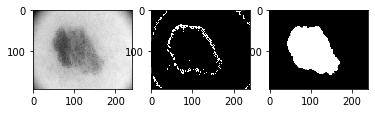

In [14]:
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(sample[0,0], 'gray')          # original img
fig.add_subplot(1, 3, 2)
plt.imshow(sample_prediction[0], 'gray') # thresholded img
fig.add_subplot(1, 3, 3)
plt.imshow(y_train[unlabeled_index[index]][0], 'gray')

In [30]:
X = np.zeros([1, img_rows, img_cols])

for t in range(nb_step_predictions):
    prediction = modelUncertain.predict(sample, verbose=0).reshape([1, img_rows, img_cols])
    X = np.concatenate((X, prediction))
X = np.delete(X, [0], 0)

In [31]:
# wo/ EDT
np.sum(np.var(X, axis=0))

8.041966290688985e-05

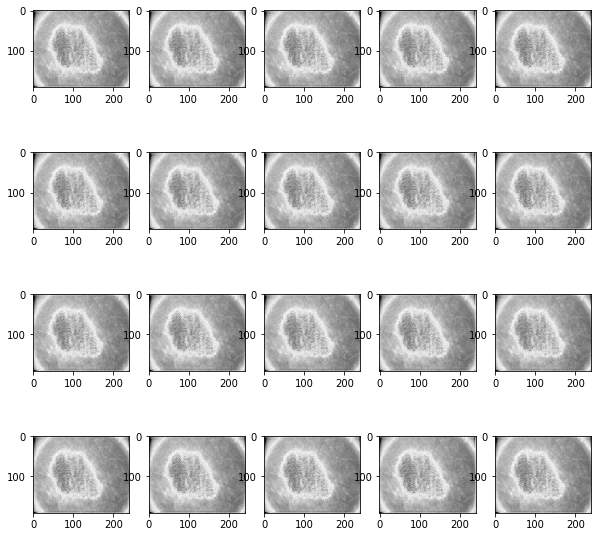

In [42]:
fig = plt.figure(figsize=(10,10))
for idx in range(0, 20):
    fig.add_subplot(4, 5, idx+1)
    plt.imshow(X[idx], 'gray')

In [41]:
for idx in range(0, 20):
    print(idx, np.min(X[idx]), np.mean(X[idx]), np.max(X[idx]))

0 0.47430747747421265 0.4938761427455271 0.5027927756309509
1 0.4743082523345947 0.49387733854042987 0.5028029680252075
2 0.4743131995201111 0.4938779675311202 0.5027986764907837
3 0.4743078649044037 0.49388174552651537 0.5027981996536255
4 0.47431689500808716 0.4938766147482157 0.5028082132339478
5 0.4743109345436096 0.49388103648735626 0.502794623374939
6 0.4743197560310364 0.4938761595358503 0.5027974843978882
7 0.47431156039237976 0.49387854430695166 0.5027934908866882
8 0.47430551052093506 0.49387862996017146 0.5027979612350464
9 0.4743337333202362 0.4938786873399901 0.5028021335601807
10 0.47430771589279175 0.4938807555474341 0.5028049349784851
11 0.47432100772857666 0.4938799639601105 0.5027926564216614
12 0.47428834438323975 0.493879428243963 0.502798855304718
13 0.474303275346756 0.49387663049532826 0.5027956366539001
14 0.47430863976478577 0.4938773842289164 0.5027980208396912
15 0.4743119776248932 0.4938764073510861 0.5027979016304016
16 0.4743203818798065 0.4938739126729261

In [43]:
transform = range_transform(edt(prediction))

In [46]:
transform.shape

(1, 192, 240)

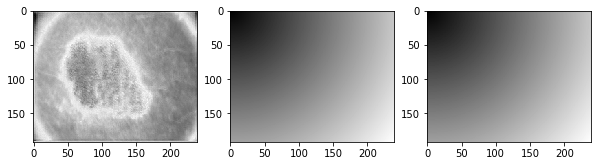

In [53]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 3, 1)
plt.imshow(prediction[0], 'gray')
fig.add_subplot(1, 3, 2)
plt.imshow(edt(prediction[0]), 'gray')
fig.add_subplot(1, 3, 3)
plt.imshow(transform[0], 'gray')